# 인물 모드 문제점 찾기

## 목차

### Import

### 1) 인물모드 직접 해 보기  
### 2) 사진에서 문제점 찾기
### 3) 해결 방법을 제안해 보기


### Import

In [1]:
!pip install pixellib
!pip install pillow==4.1.1
%reload_ext autoreload
%autoreload

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pixellib-0.7.1-py3-none-any.whl (430 kB)
  Using cached PyQt5-5.15.6-cp36-abi3-manylinux1_x86_64.whl (8.3 MB)
  Using cached black-22.3.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)
  Using cached yacs-0.1.8-py3-none-any.whl (14 kB)
  Using cached imantics-0.1.12.tar.gz (13 kB)
  Using cached hydra_core-1.2.0-py3-none-any.whl (151 kB)
  Using cached dataclasses-0.6-py3-none-any.whl (14 kB)
  Using cached fvcore-0.1.5.post20220512.tar.gz (50 kB)
  Using cached labelme2coco-0.2.1-py3-none-any.whl (18 kB)
  Using cached iopath-0.1.9-py3-none-any.whl (27 kB)
  Using cached omegaconf-2.2.2-py3-none-any.whl (79 kB)
  Using cached pathspec-0.9.0-py2.py3-none-any.whl (31 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Using cached mypy_extensions-0.4.3-py2.py3-none-any.whl (4.5 kB)
  Using cached platformdirs-2.5.2-py3-none-any.whl (14 kB)
  Using c

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Pillow-4.1.1-cp37-cp37m-linux_x86_64.whl
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.1.1
    Uninstalling Pillow-9.1.1:
      Successfully uninstalled Pillow-9.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.12.0+cu113 requires pillow!=8.3.*,>=5.3.0, but you have pillow 4.1.1 which is incompatible.
scikit-image 0.18.3 requires pillow!=7.1.0,!=7.1.1,>=4.3.0, but you have pillow 4.1.1 which is incompatible.
sahi 0.9.4 requires pillow>=8.2.0, but you have pillow 4.1.1 which is incompatible.
bokeh 2.3.3 requires pillow>=7.1.0, but you have pillow 4.1.1 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

/usr/local/lib/python3.7/dist-packages/pixellib/semantic/deeplab.py

```python
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf

from tensorflow.keras.models import Model # python.지우기!
from tensorflow.keras import layers # python.지우기!
from tensorflow.keras.layers import Input # python.지우기!
from tensorflow.keras.layers import Lambda # python.지우기!
from tensorflow.keras.layers import Activation # python.지우기!
from tensorflow.keras.layers import Concatenate # python.지우기!
from tensorflow.keras.layers import Add # python.지우기!
from tensorflow.keras.layers import Dropout # python.지우기!
from tensorflow.keras.layers import BatchNormalization # python.지우기!
from tensorflow.keras.layers import Conv2D # python.지우기!
from tensorflow.keras.layers import DepthwiseConv2D # python.지우기!
from tensorflow.keras.layers import ZeroPadding2D # python.지우기! 
from tensorflow.keras.layers import GlobalAveragePooling2D # python.지우기!
from tensorflow.keras.utils import get_source_inputs # layer_utils 지우기!
from tensorflow.keras import backend as K

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.InteractiveSession(config=config)
.......

```

DeepLab 모델 불러온 후 생성

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
model_dir = 'drive/MyDrive/코드 및 데이터파일/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

if not os.path.exists(model_file):
    # PixelLib가 제공하는 모델의 url입니다
    MODEL_URL = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

    # 다운로드를 시작합니다
    urllib.request.urlretrieve(MODEL_URL, model_file)

In [5]:
# 세그멘테이션 모델 생성
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

PASCAL VOC 데이터 라벨 종류

In [25]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

In [7]:
# seg_color 반환 함수
def get_colormap(label_name):
    # 아래 코드를 이해하지 않아도 좋습니다
    # PixelLib에서 그대로 가져온 코드입니다
    # 주목해야 할 것은 생상 코드 결과물이예요!
    colormap = np.zeros((256, 3), dtype = int)
    ind = np.arange(256, dtype=int)

    for shift in reversed(range(8)):
        for channel in range(3):
            colormap[:, channel] |= ((ind >> channel) & 1) << shift
        ind >>= 3

    # colormap[:20]

    index = LABEL_NAMES.index(label_name)  # 데이터 라벨 인덱스
    seg_color = colormap[index].tolist()  # BGR
    seg_color = seg_color[::-1]  # BGR2RGB
    return seg_color  # RGB

In [8]:
# 이미지 1개 그리기
def draw_img(img, img_title='', cmap=None):
    print(img.shape)

    # plt.figure(figsize=(12,12))
    plt.imshow(img, cmap)
    plt.title(img_title)
    plt.rc('axes', titlesize=20)
    plt.axis('off')

    plt.show()

In [9]:
# 이미지 2개 그리기
def draw_imgs(img_1, img_2, img_1_title='', img_2_title=''):
    plt.figure(figsize=(12,8))

    plt.subplot(211)
    plt.imshow(img_1)
    plt.title(img_1_title)
    plt.rc('axes', titlesize=20)
    plt.axis('off')

    plt.subplot(212)
    plt.imshow(img_2)
    plt.title(img_2_title)
    plt.rc('axes', titlesize=20)
    plt.axis('off')

    plt.show()

### 1) 인물모드 직접 해보기

SELFIE

In [13]:
self_img_path = 'drive/MyDrive/코드 및 데이터파일/self.png'
self_img_origin = cv2.imread(self_img_path)

(960, 722, 3)


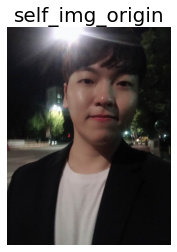

In [14]:
draw_img(cv2.cvtColor(self_img_origin, cv2.COLOR_BGR2RGB), 'self_img_origin')

DeepLab 모델에 이미지 입력

In [15]:
# 모델에 이미지 입력
self_segvalues, self_output = model.segmentAsPascalvoc(self_img_path)

In [16]:
# 영역 검출된 클래스 출력
for class_id in self_segvalues['class_ids']:
    print(label_names[class_id])

background
person


(960, 722, 3)


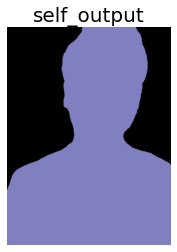

In [17]:
# 모델 출력값 확인
draw_img(self_output, 'self_output')

(960, 722)


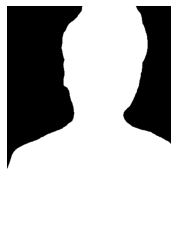

In [26]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_color = get_colormap('person')
self_seg_map = np.all(self_output==seg_color, axis=-1)

draw_img(self_seg_map, cmap='gray')

(960, 722, 3)


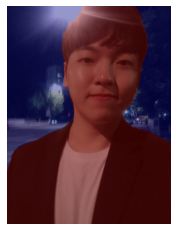

In [27]:
self_img_show = self_img_origin.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
self_img_mask = self_seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
self_color_mask = cv2.applyColorMap(self_img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
self_img_show = cv2.addWeighted(self_img_show, 0.6, self_color_mask, 0.4, 0.0)

draw_img(cv2.cvtColor(self_img_show, cv2.COLOR_BGR2RGB))

(960, 722, 3)


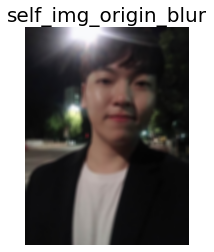

In [28]:
# blurring kernel size = (17,17)
self_img_origin_blur = cv2.blur(self_img_origin, (17,17))

draw_img(cv2.cvtColor(self_img_origin_blur, cv2.COLOR_BGR2RGB), 'self_img_origin_blur')

(960, 722, 3)


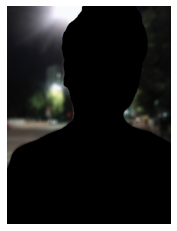

In [29]:
self_img_mask_color = cv2.cvtColor(self_img_mask, cv2.COLOR_GRAY2BGR)
self_img_bg_mask = cv2.bitwise_not(self_img_mask_color)
self_img_bg_blur = cv2.bitwise_and(self_img_origin_blur, self_img_bg_mask)

draw_img(cv2.cvtColor(self_img_bg_blur, cv2.COLOR_BGR2RGB))

(960, 722, 3)


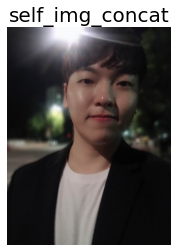

In [30]:
self_img_concat = np.where(self_img_mask_color==255, self_img_origin, self_img_bg_blur)

draw_img(cv2.cvtColor(self_img_concat, cv2.COLOR_BGR2RGB), 'self_img_concat')

In [31]:
plt.imsave('/content/drive/MyDrive/코드 및 데이터파일/self_blur.png', cv2.cvtColor(self_img_concat, cv2.COLOR_BGR2RGB))

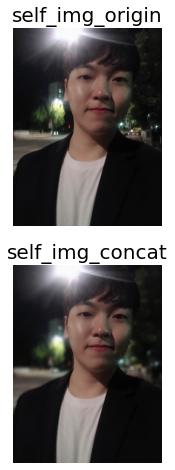

In [32]:
draw_imgs(cv2.cvtColor(self_img_origin, cv2.COLOR_BGR2RGB), cv2.cvtColor(self_img_concat, cv2.COLOR_BGR2RGB), 'self_img_origin', 'self_img_concat')

CAT

In [33]:
CAT_IMG_PATH = '/content/drive/MyDrive/코드 및 데이터파일/cat.png'  
CAT_IMG_ORIG = cv2.imread(CAT_IMG_PATH) 

(370, 296, 3)


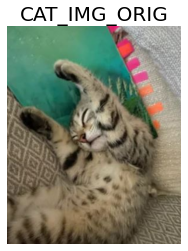

In [34]:
draw_img(cv2.cvtColor(CAT_IMG_ORIG, cv2.COLOR_BGR2RGB), 'CAT_IMG_ORIG')

In [36]:
# 모델에 이미지 입력
CAT_SEGVALUES, CAT_OUTPUT = model.segmentAsPascalvoc(CAT_IMG_PATH)

In [37]:
# 영역 검출된 클래스 출력
for class_id in CAT_SEGVALUES['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat


(370, 296, 3)


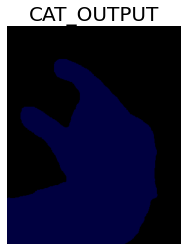

In [38]:
# 모델 출력값 확인
draw_img(CAT_OUTPUT, 'CAT_OUTPUT')

(370, 296)


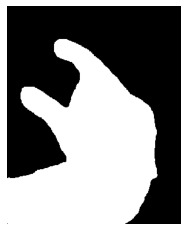

In [39]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_color = get_colormap('cat')
cat_seg_map = np.all(CAT_OUTPUT==seg_color, axis=-1)

draw_img(cat_seg_map, cmap='gray')

(370, 296, 3)


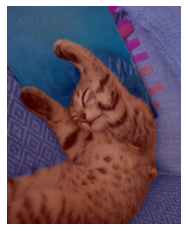

In [40]:
cat_img_show = CAT_IMG_ORIG.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
cat_img_mask = cat_seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
cat_color_mask = cv2.applyColorMap(cat_img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
cat_img_show = cv2.addWeighted(cat_img_show, 0.6, cat_color_mask, 0.4, 0.0)

draw_img(cv2.cvtColor(cat_img_show, cv2.COLOR_BGR2RGB))

(370, 296, 3)


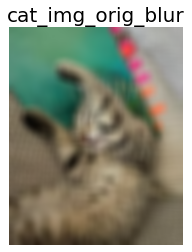

In [41]:
# blurring kernel size = (17,17)
cat_img_orig_blur = cv2.blur(CAT_IMG_ORIG, (17,17))

draw_img(cv2.cvtColor(cat_img_orig_blur, cv2.COLOR_BGR2RGB), 'cat_img_orig_blur')

(370, 296, 3)


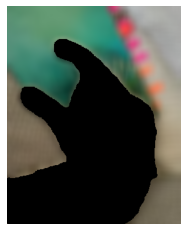

In [42]:
cat_img_mask_color = cv2.cvtColor(cat_img_mask, cv2.COLOR_GRAY2BGR)
cat_img_bg_mask = cv2.bitwise_not(cat_img_mask_color)
cat_img_bg_blur = cv2.bitwise_and(cat_img_orig_blur, cat_img_bg_mask)

draw_img(cv2.cvtColor(cat_img_bg_blur, cv2.COLOR_BGR2RGB))

(370, 296, 3)


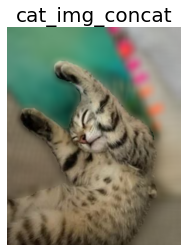

In [43]:
cat_img_concat = np.where(cat_img_mask_color==255, CAT_IMG_ORIG, cat_img_bg_blur)

draw_img(cv2.cvtColor(cat_img_concat, cv2.COLOR_BGR2RGB), 'cat_img_concat')

In [44]:
# cf. plt.savefig() 는 plt.show() 직전에 해야 처리가 끝난 이미지 저장이 제대로 된다.
# plt.savefig('image.png', bbox_inches='tight',pad_inches = 0) 로는 공백 및 테두리 숨기기가 제대로 안 됐기에 plt.imsave('image.png', img)를 사용함
plt.imsave("/content/drive/MyDrive/코드 및 데이터파일/cat_blur.png", cv2.cvtColor(cat_img_concat, cv2.COLOR_BGR2RGB))

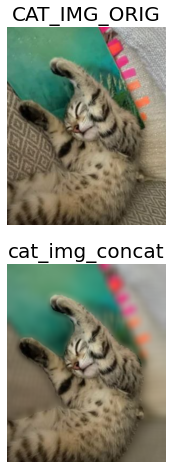

In [45]:
draw_imgs(cv2.cvtColor(CAT_IMG_ORIG, cv2.COLOR_BGR2RGB), cv2.cvtColor(cat_img_concat, cv2.COLOR_BGR2RGB), 'CAT_IMG_ORIG', 'cat_img_concat')

Background

In [46]:
BACK_IMG_PATH = '/content/drive/MyDrive/코드 및 데이터파일/waves.png'  
BACK_IMG_ORIG = cv2.imread(BACK_IMG_PATH) 

(389, 580, 3)


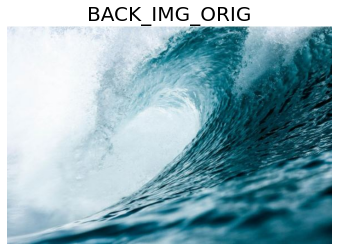

In [49]:
draw_img(cv2.cvtColor(BACK_IMG_ORIG, cv2.COLOR_BGR2RGB), 'BACK_IMG_ORIG')

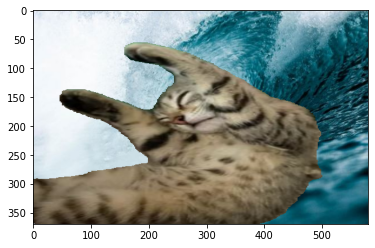

In [50]:
cat_resized = cv2.resize(
    CAT_IMG_ORIG, (BACK_IMG_ORIG.shape[1], CAT_IMG_ORIG.shape[0]))
back_img_resized = cv2.resize(
    BACK_IMG_ORIG, (BACK_IMG_ORIG.shape[1], CAT_IMG_ORIG.shape[0]))
cat_img_mask_resized = cv2.resize(
    cat_img_mask_color, (BACK_IMG_ORIG.shape[1], CAT_IMG_ORIG.shape[0]))

cat_back_concat = np.where(
    cat_img_mask_resized == 255, cat_resized, back_img_resized)

plt.imshow(cv2.cvtColor(cat_back_concat, cv2.COLOR_BGR2RGB))
plt.show()

### 2) 사진에서 문제점 찾기

- 고양이 이미지에 비해 배경 이미지가 너무 커서 사진이 늘어나있다.
- 고양이 주변에 부자연스러운 경계선이 있는듯한 느낌을 준다.

### 3) 해결 방법을 제안해 보기

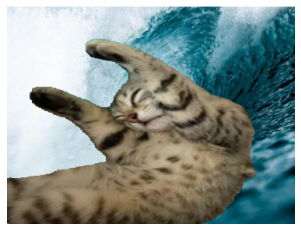

In [60]:
plt.axis('off')
cat_back_concat_resized = cv2.resize(cat_back_concat, (370, 280))
plt.imshow(cv2.cvtColor(cat_back_concat_resized, cv2.COLOR_BGR2RGB))

사진크기 줄이기

**세그멘테이션의 한계**  
Semantic segmentation의 부정확성이 여러가지 문제를 발생시키는 주요 원인입니다. 피사계심도를 이용한 보케(아웃포커싱) 효과는 말 그대로 심도를 표현하기 때문에 초점이 잡힌 거리를 광학적으로 아주 섬세하게 구별(segmentation) 하지만 이를 따라한 semantic segmentation 모듈은 정확도가 1.00 이 되지 않는 한 완벽히 구현하기는 힘듭니다.

**피사계 심도 이해하기**  
우선 피사계심도의 개념부터 명확히 이해해 봅시다.

참고자료 : https://ggyul.tistory.com/12

**3D Depth Camera 활용하기**  
카메라 2개를 통해 생성한 3d 영상으로 인물모드를 더 정확하게 만들 수 있을까요? 우리는 카메라 1대가 찍은 영상에서 semantic segmentation을 시도하였고, 그 결과가 정확하지 않았습니다. 요즘 스마트폰의 카메라는 렌즈가 2개 달려있지요? 왜 굳이 그렇게까지 하는지 아래 링크를 보면서 이해해 봅시다.

참고자료 : https://m.blog.naver.com/panoptics/221336152952

**깊이 영상(Depth image) 활용하기**  
하지만 꼭 카메라가 2개여야 할까요? 아래 이미지는 Struct2Depth 라는 기법을 소개한 Google Brain의 논문에 있는 이미지입니다. 세번째 컬럼이 보다 명확하게 depth에 따른 물체인식을 보여 주는데, 이것은 LiDAR가 없이도 아주 정확한 segmentation을 동반한 depth sensor가 가능함을 보여줍니다.

참고자료 : https://towardsdatascience.com/depth-prediction-autonomous-driving-18d05ff25dd6 참고자료 : https://sites.google.com/view/struct2depth

**IR(적외선)을 활용한 사례**  
구글 pixel4에 IR 카메라가 달려있는데, 이를 통해 보다 멋진 3d depth sensing이 가능하다는군요.

참고자료 : https://ai.googleblog.com/2020/04/udepth-real-time-3d-depth-sensing-on.html